In [1]:
# all the imports necessary for the code to run
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt  
import numpy as np

In [2]:
# extracting data from dataset file
data = pd.read_csv('dataset.csv')
data_array = data.values

In [3]:
# printing the original data in table format
data

,iso,country,date,grocery_pharmacy,parks,residential,retail_recreation,transit_stations,workplaces,total_cases,fatalities
0,AR,Argentina,2020-02-23,8.185,17.563,0.437,13.644,5.334,-2.486,0,0
1,AR,Argentina,2020-02-24,-15.875,25.605,6.321,-9.973,-26.785,-53.687,0,0
2,AR,Argentina,2020-02-25,-17.135,1.325,6.895,-19.717,-28.485,-50.053,0,0
3,AR,Argentina,2020-02-26,2.304,5.399,-2.273,0.845,9.461,12.584,0,0
4,AR,Argentina,2020-02-27,-0.404,-5.267,-0.493,-0.584,7.983,12.407,0,0
...,...,...,...,...,...,...,...,...,...,...,...
812,ZA,South Africa,2020-04-01,-42.446,-37.600,34.916,-69.728,-77.371,-72.935,1380,5
813,ZA,South Africa,2020-04-02,-40.523,-38.226,36.550,-69.577,-77.874,-73.331,1462,5
814,ZA,South Africa,2020-04-03,-42.107,-43.271,38.379,-71.513,-77.944,-72.745,1505,9
815,ZA,South Africa,2020-04-04,-51.515,-57.252,26.499,-76.589,-77.026,-55.095,1585,9


In [4]:
# dividing our columns into different arrays to prepare them for the algorithms
grocery = data['grocery_pharmacy'].values.reshape(-1,1)
parks = data['parks'].values.reshape(-1,1)
residential = data['residential'].values.reshape(-1,1)
retail = data['retail_recreation'].values.reshape(-1,1)
transit = data['transit_stations'].values.reshape(-1,1)
work = data['workplaces'].values.reshape(-1,1)
cases = data['total_cases'].values.reshape(-1,1)
deaths = data['fatalities'].values.reshape(-1,1)

In [5]:
# The next 5 sets of instructions is for pre-processing but is not being used at the moment
labelencoder_X = LabelEncoder()

In [6]:
start_date=datetime.strptime(min(data.iloc[:,2]),"%Y-%m-%d")
independent_data=data.iloc[:,0:1].values
dates=data.iloc[:,2].values
new_dates=[]
dependant_data=data.iloc[:,9:].values

In [7]:
for row in data.iloc[:,2].values: #calculates diff of dates in days
  new_dates.append((datetime.strptime(row,"%Y-%m-%d")-start_date).days)

In [8]:
# independent_data[:,0] = labelencoder_X.fit_transform(independent_data[:,0])
independent_data = OneHotEncoder().fit_transform(independent_data).toarray()
independent_data = np.append(independent_data,np.array(new_dates)[:, None],axis=1) #append dates
independent_data = np.append(independent_data,data.iloc[:,3:9].values,axis=1)

In [9]:
independent_data

array([[  1.   ,   0.   ,   0.   , ...,  13.644,   5.334,  -2.486],
       [  1.   ,   0.   ,   0.   , ...,  -9.973, -26.785, -53.687],
       [  1.   ,   0.   ,   0.   , ..., -19.717, -28.485, -50.053],
       ...,
       [  0.   ,   0.   ,   0.   , ..., -71.513, -77.944, -72.745],
       [  0.   ,   0.   ,   0.   , ..., -76.589, -77.026, -55.095],
       [  0.   ,   0.   ,   0.   , ..., -75.913, -78.001, -44.329]])

In [10]:
################# Grocery Analysis #####################

# Split the data into training and testing
X_grocery_train, X_grocery_test = train_test_split(grocery, test_size=0.2, random_state=0)
y_cases_train, y_cases_test = train_test_split(cases, test_size=0.2, random_state=0)
y_deaths_train, y_deaths_test = train_test_split(deaths, test_size=0.2, random_state=0)

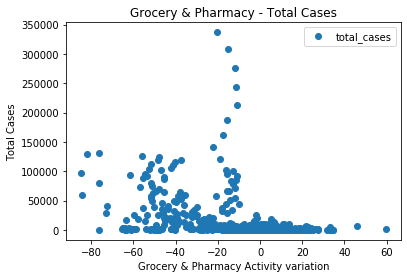

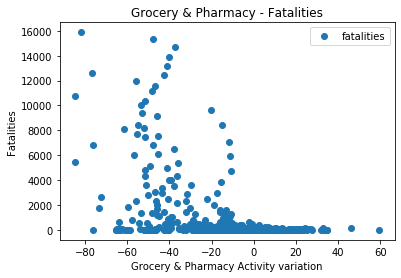

In [11]:
# show data regarding pharmacy vs Cases
data.plot(x='grocery_pharmacy', y='total_cases', style='o')  
plt.title('Grocery & Pharmacy - Total Cases')  
plt.xlabel('Grocery & Pharmacy Activity variation')  
plt.ylabel('Total Cases')  
plt.show()

# show data regarding pharmacy vs Deaths
data.plot(x='grocery_pharmacy', y='fatalities', style='o')  
plt.title('Grocery & Pharmacy - Fatalities')  
plt.xlabel('Grocery & Pharmacy Activity variation')  
plt.ylabel('Fatalities')  
plt.show()

In [22]:
### Linear Regression


linear_regressor = LinearRegression()  

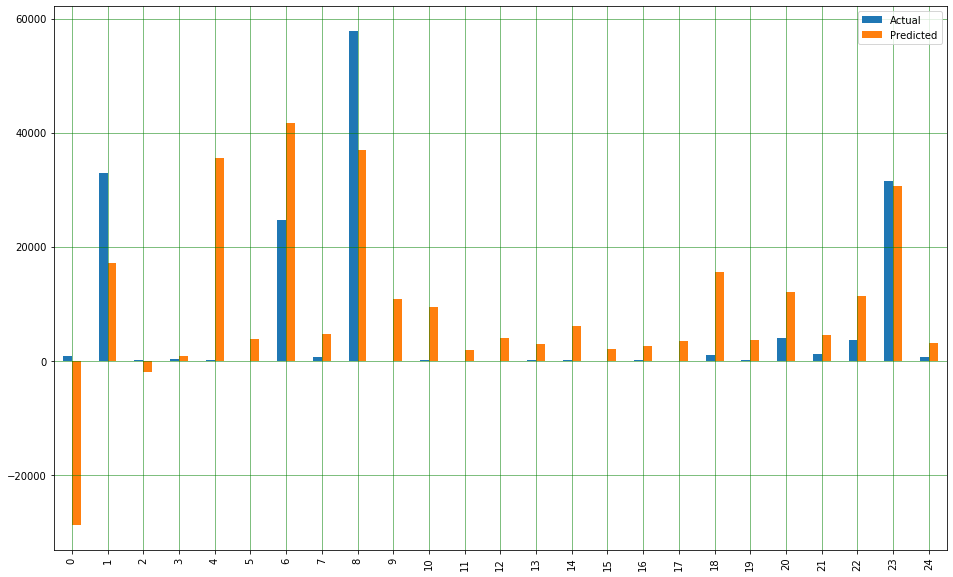

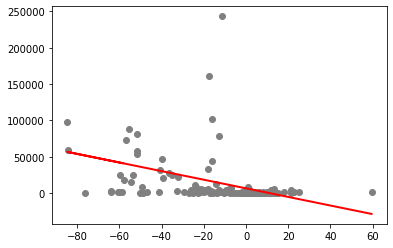

,Actual,Predicted
0,927,-28842.121250
1,32986,17132.406107
2,60,-2030.410561
3,241,837.554426
4,158,35464.040193
...,...,...
159,25,2777.177928
160,499,22391.428044
161,17963,40673.890245
162,2247,25893.888074


In [23]:
## Grocery vs Cases
linear_regressor.fit(X_grocery_train, y_cases_train) #training the algorithm
grocery_cases_pred = linear_regressor.predict(X_grocery_test)

# Graphic showing actual vs predicted values

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression

plt.scatter(X_grocery_test, y_cases_test,  color='gray')
plt.plot(X_grocery_test, grocery_cases_pred, color='red', linewidth=2)
plt.show()

# Table showing actual vs predicted values

df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

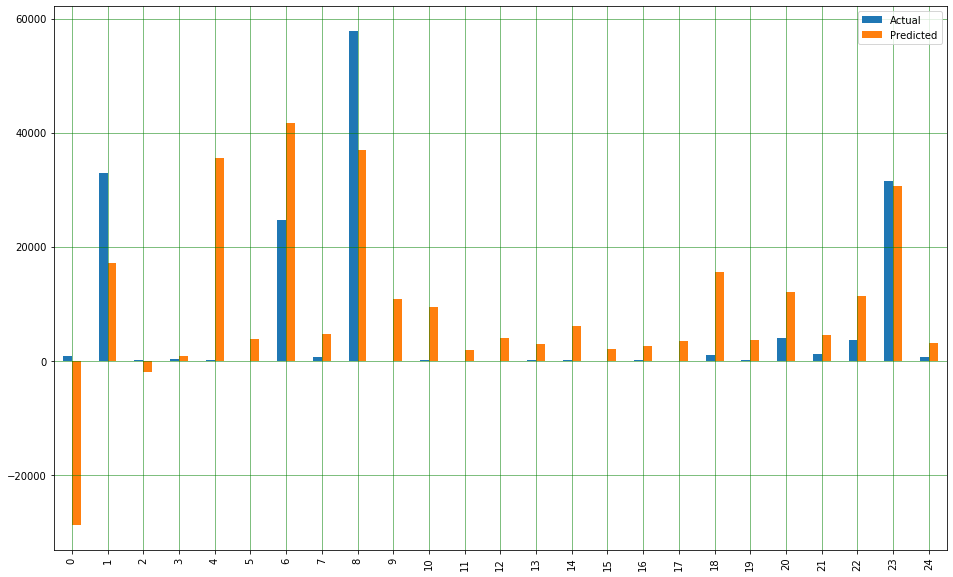

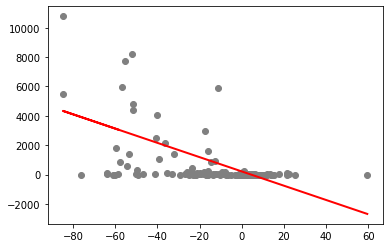

,Actual,Predicted
0,927,-2675.581204
1,32986,1096.784783
2,60,-475.589355
3,241,-240.263095
4,158,2600.957569
...,...,...
159,25,-81.110405
160,499,1528.305379
161,17963,3028.443446
162,2247,1815.694111


In [25]:
## Grocery vs Deaths
linear_regressor.fit(X_grocery_train, y_deaths_train) #training the algorithm
grocery_deaths_pred = linear_regressor.predict(X_grocery_test)

# Graphic showing actual vs predicted values

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Graphic showing result of the linear regression

plt.scatter(X_grocery_test, y_deaths_test,  color='gray')
plt.plot(X_grocery_test, grocery_deaths_pred, color='red', linewidth=2)
plt.show()

# Table showing actual vs predicted values

df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

In [27]:
### Decision Tree

# Fit regression model
decision_tree_regressor = DecisionTreeRegressor(max_depth=5)

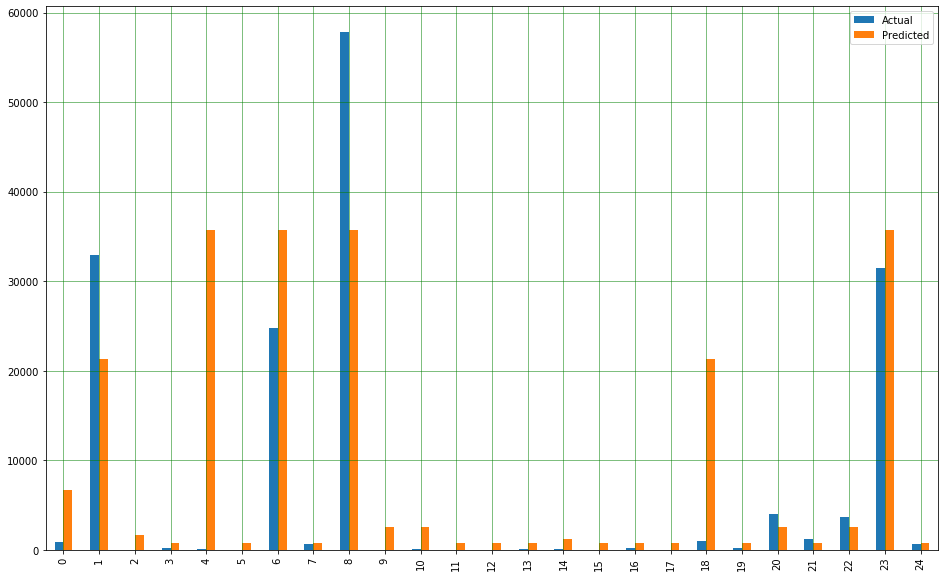

,Actual,Predicted
0,927,6683.000000
1,32986,21324.018519
2,60,1665.236364
3,241,818.975104
4,158,35748.891566
...,...,...
159,25,818.975104
160,499,21324.018519
161,17963,35748.891566
162,2247,21324.018519


In [29]:
## Grocery vs Cases

decision_tree_regressor.fit(X_grocery_train, y_cases_train)
grocery_cases_pred = decision_tree_regressor.predict(X_grocery_test)

# Graphic showing actual vs predicted values

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Table showing actual vs predicted values

df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

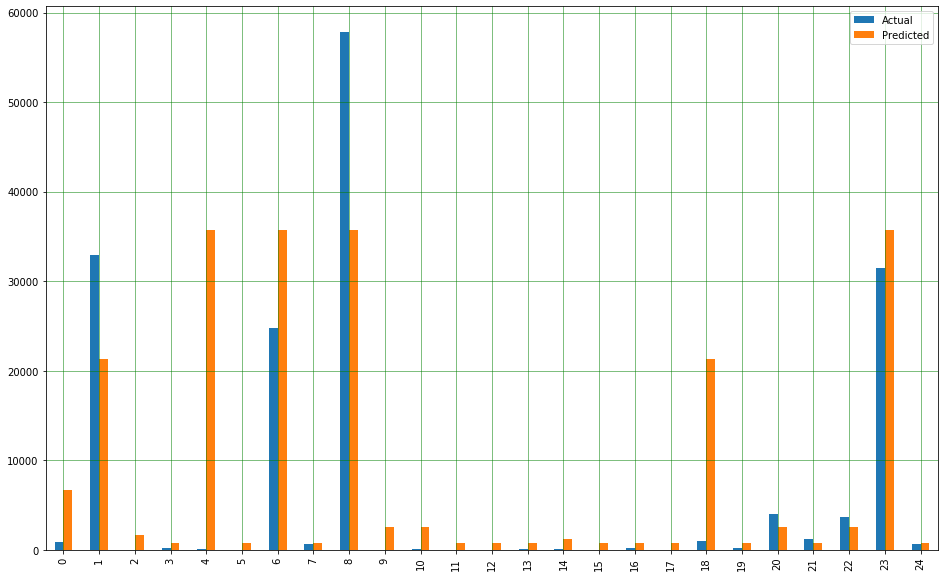

,Actual,Predicted
0,927,149.000000
1,32986,465.224490
2,60,31.763158
3,241,16.207006
4,158,3497.803571
...,...,...
159,25,16.207006
160,499,465.224490
161,17963,2029.250000
162,2247,1076.181818


In [30]:
## Grocery vs Deaths

decision_tree_regressor.fit(X_grocery_train, y_deaths_train)
grocery_deaths_pred = decision_tree_regressor.predict(X_grocery_test)

# Graphic showing actual vs predicted values

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Table showing actual vs predicted values

df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

In [31]:
### Support Vector Machecins
svm_regressor = svm.SVR()

/home/leonormsousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


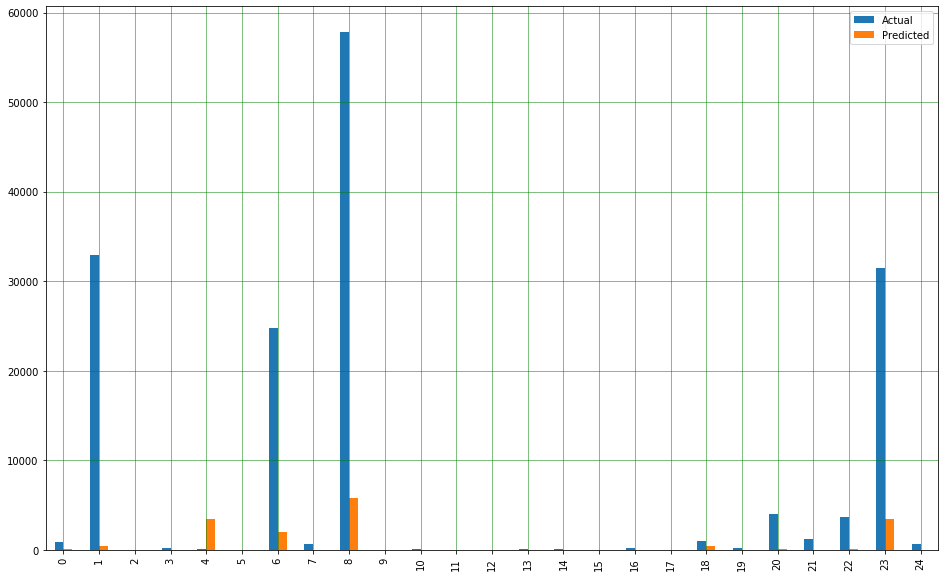

,Actual,Predicted
0,927,694.074698
1,32986,739.903962
2,60,575.316883
3,241,559.445453
4,158,766.167120
...,...,...
159,25,558.200001
160,499,782.631399
161,17963,744.815113
162,2247,789.789283


In [32]:
## Grocery vs Cases

svm_regressor.fit(X_grocery_train, y_cases_train)
grocery_cases_pred = svm_regressor.predict(X_grocery_test)

# Graphic showing actual vs predicted values

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Table showing actual vs predicted values

df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_cases_pred.flatten()})
df

/home/leonormsousa/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


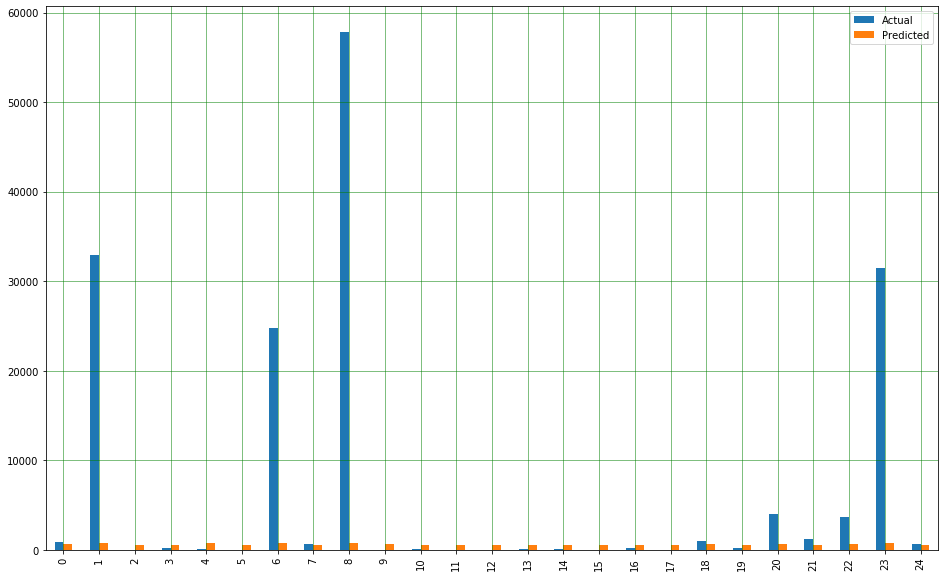

,Actual,Predicted
0,927,42.936544
1,32986,55.436972
2,60,5.816877
3,241,0.937923
4,158,72.299693
...,...,...
159,25,0.023308
160,499,74.382530
161,17963,60.090051
162,2247,80.320624


In [33]:
## Grocery vs Deaths

svm_regressor.fit(X_grocery_train, y_deaths_train)
grocery_deaths_pred = svm_regressor.predict(X_grocery_test)

# Graphic showing actual vs predicted values

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Table showing actual vs predicted values

df = pd.DataFrame({'Actual': y_cases_test.flatten(), 'Predicted': grocery_deaths_pred.flatten()})
df

In [ ]:
################# Bibliography #####################

# Linear Regression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

# Decision Tree
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py

# Support Vector Machecins
# https://scikit-learn.org/stable/modules/svm.html#svm-regression